In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pathh='listings.csv'
df = pd.read_csv(pathh)

In [3]:
df.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039.0,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2.0,2.0,0.0,0.0,1.51
1,13913,https://www.airbnb.com/rooms/13913,20200824024753,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/ffb507b7-983c...,54730.0,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,3.0,1.0,2.0,0.0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20200824024753,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302.0,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1.0,1.0,0.0,0.0,0.68
3,17402,https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,t,14.0,14.0,0.0,0.0,0.37
4,17506,https://www.airbnb.com/rooms/17506,20200824024753,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915.0,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2.0,0.0,2.0,0.0,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43909 entries, 0 to 43908
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43909 non-null  int64  
 1   listing_url                                   43909 non-null  object 
 2   scrape_id                                     43909 non-null  int64  
 3   last_scraped                                  43909 non-null  object 
 4   name                                          43888 non-null  object 
 5   description                                   43483 non-null  object 
 6   neighborhood_overview                         28101 non-null  object 
 7   picture_url                                   43909 non-null  object 
 8   host_id                                       43908 non-null  float64
 9   host_url                                      43908 non-null 

In [5]:
df.isnull().sum() 
#checking missing values

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              21
                                                ... 
calculated_host_listings_count                     1
calculated_host_listings_count_entire_homes        1
calculated_host_listings_count_private_rooms       1
calculated_host_listings_count_shared_rooms        1
reviews_per_month                               8259
Length: 74, dtype: int64

In [6]:
# Drop columns with all missing values or irrelevant columns
columns_to_drop = [
    'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'
]  # Columns with 0 non-null values
df = df.drop(columns=columns_to_drop)
#'bathrooms': Likely includes detailed bathroom information, which might not be useful for your current analysis.
#'calendar_updated': This could be a timestamp or indicator for when the calendar was updated, which might not be needed.

In [9]:
print(df.columns)



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 

In [10]:
# Defining columns to dropp
columns_to_drop = ['neighbourhood_cleansed', 'bathrooms_text', 'calendar_last_scraped']

# Drop columns that exist in the Df 
#just like cross verifying whether that col exists
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)



In [14]:
def print_all(x):
    
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    print(x)
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_rows')

In [15]:
def price_to_numeric(row):
    '''Converts the price column to numeric'''
    return  float(row['price'].replace('$','').replace(',',''))

In [17]:
def rate_to_numeric(row,col):
    ''' Converts the host response rate and acceptance rate columns to numeric'''
    if row[col] is np.nan:
        return row[col]
    else:
        return float(row[col].replace('%',''))
        

In [18]:
df['host_response_rate'] = df.apply(rate_to_numeric, col ='host_response_rate', axis=1)
df['host_acceptance_rate'] = df.apply(rate_to_numeric, col ='host_acceptance_rate', axis=1)

In [19]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'numb

In [20]:

cols_to_drop = df.columns[df.isna().all()].to_list()
df = df.drop(columns = cols_to_drop )

In [22]:
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'name', 'description',
                'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
                'host_name', 'host_since', 'host_location', 'host_about',
                'host_thumbnail_url', 'host_picture_url',
                'neighbourhood', 'calendar_last_scraped',
                'host_neighbourhood', 'host_verifications']

# Filter out columns that do not exist
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Drop the columns
df = df.drop(columns=existing_cols_to_drop)


In [23]:
df.columns

Index(['last_scraped', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [24]:
list(df.dtypes.unique())

[dtype('O'), dtype('float64')]

In [25]:
# Identify categorical columns
categorical_columns = df.dtypes[df.dtypes == 'O'].index.to_list()

# Identify numerical columns
numerical_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index.to_list()


In [26]:
categorical_columns


['last_scraped',
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'property_type',
 'room_type',
 'amenities',
 'price',
 'has_availability',
 'first_review',
 'last_review',
 'instant_bookable']

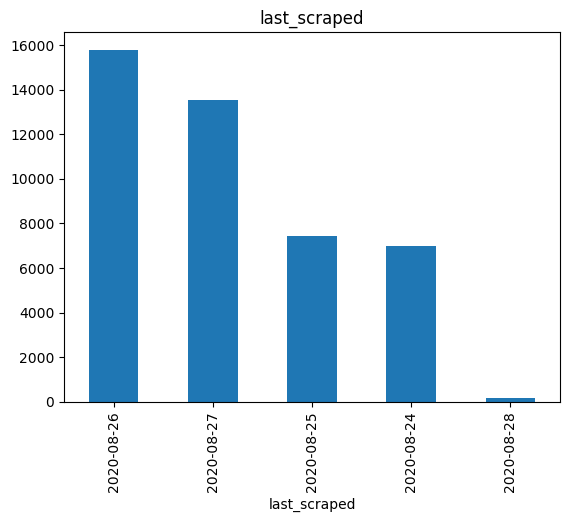

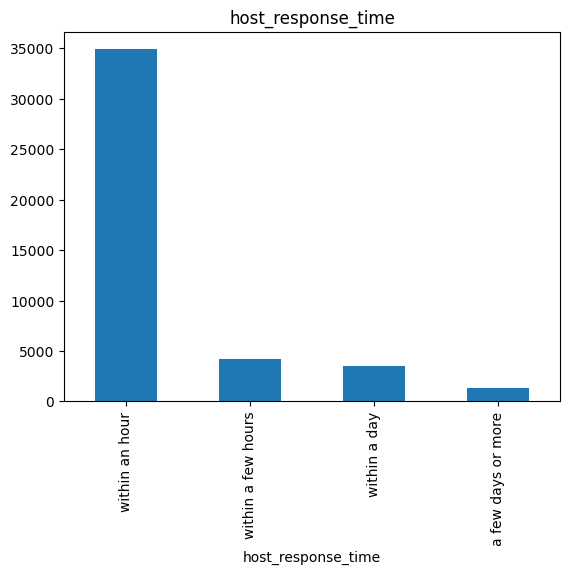

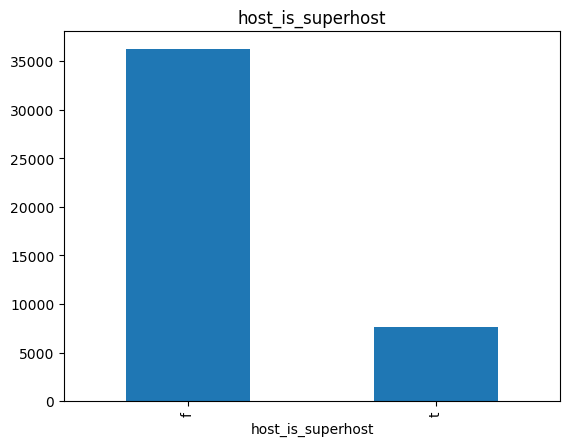

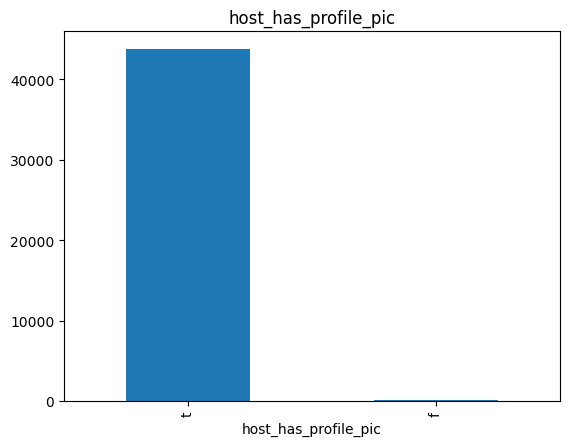

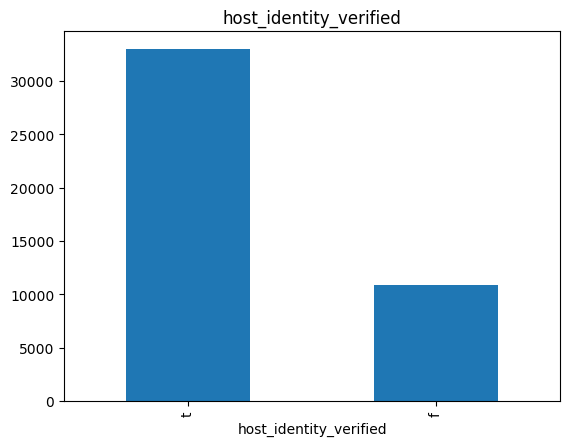

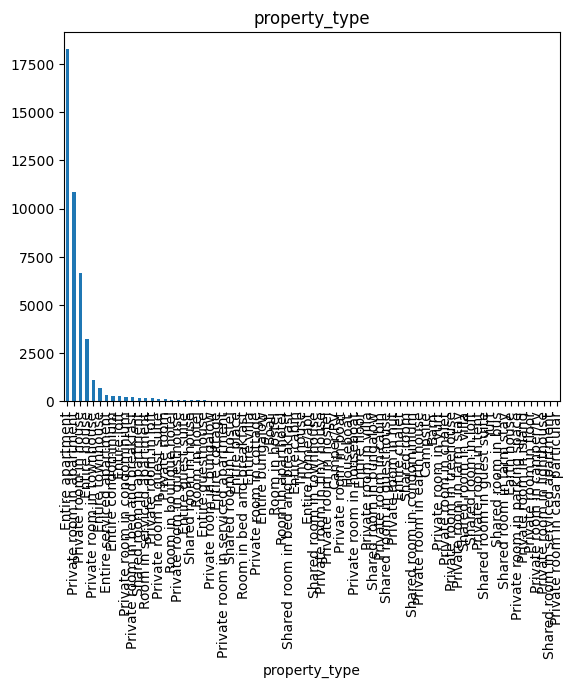

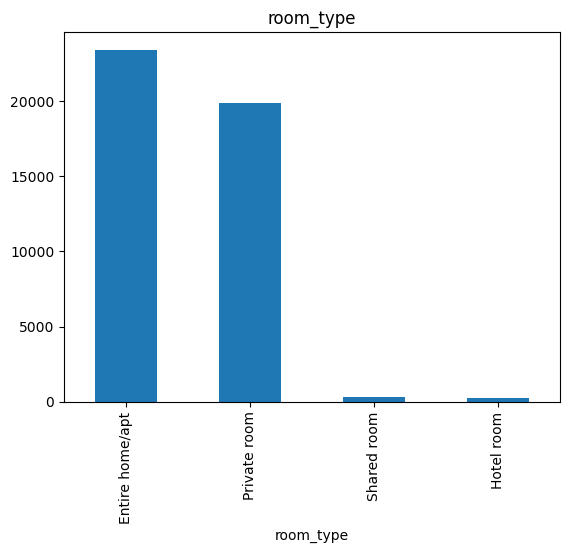

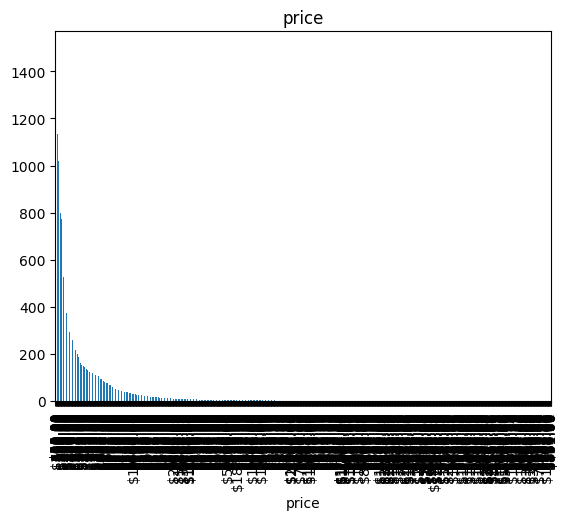

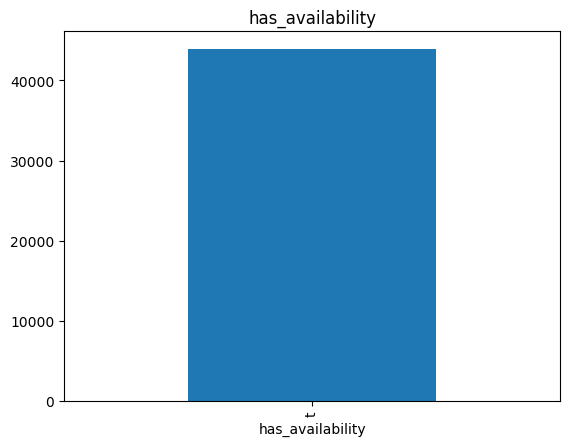

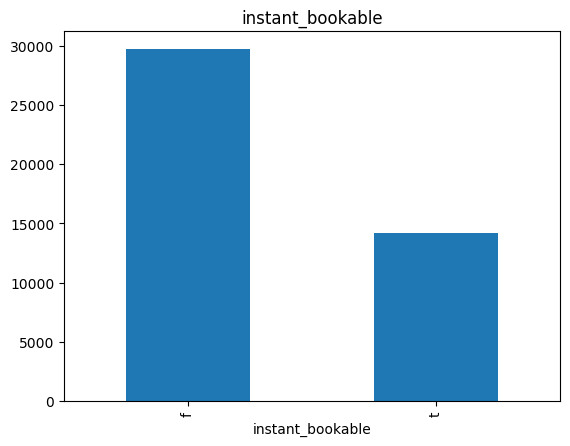

In [27]:
for col in categorical_columns:
    if col not in ['amenities', 'last_review', 'first_review']:
        df[col].value_counts().plot(kind = 'bar', title = col)
        plt.show()

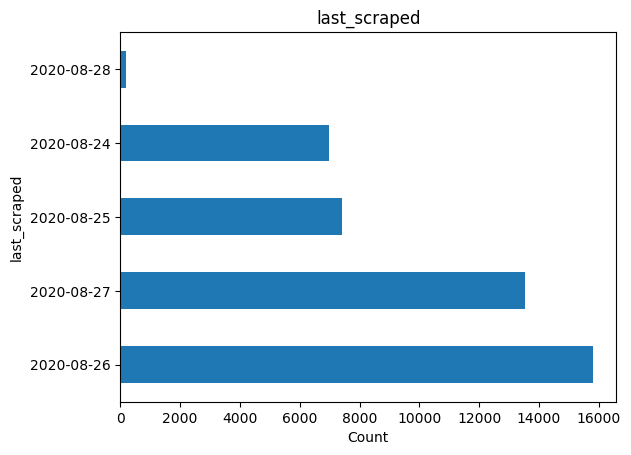

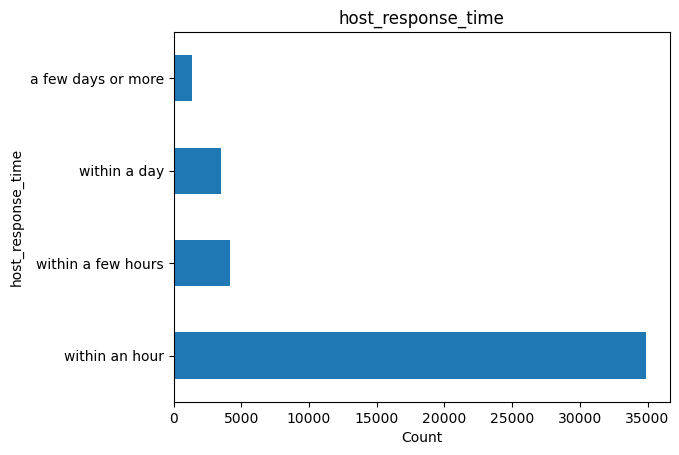

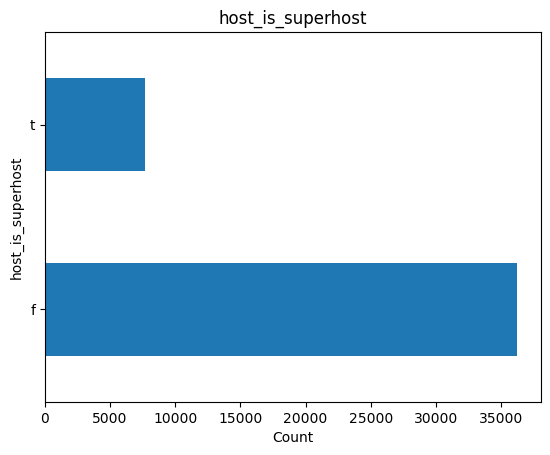

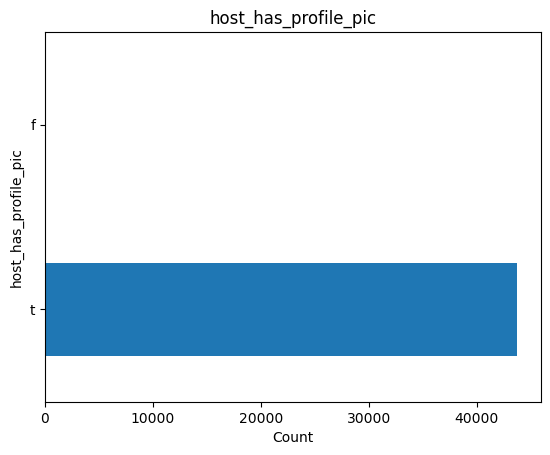

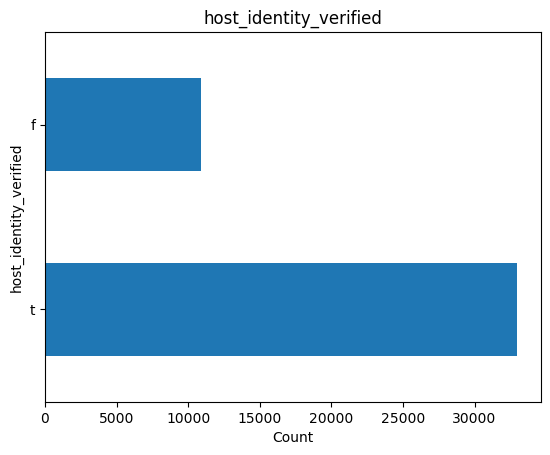

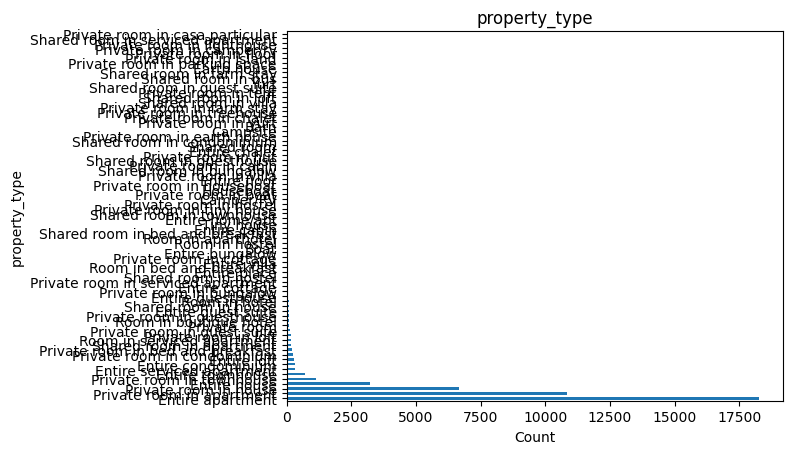

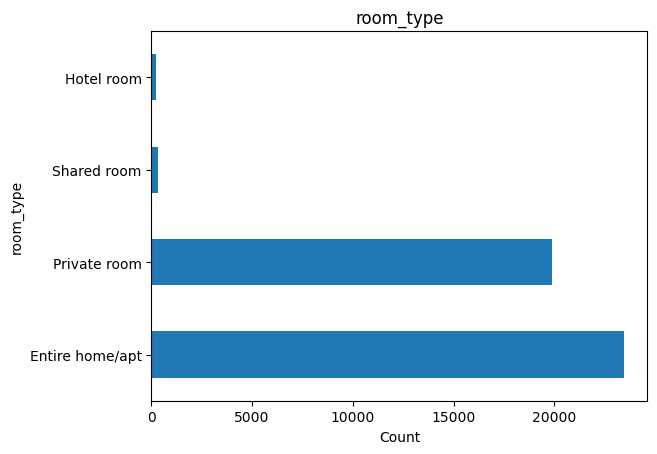

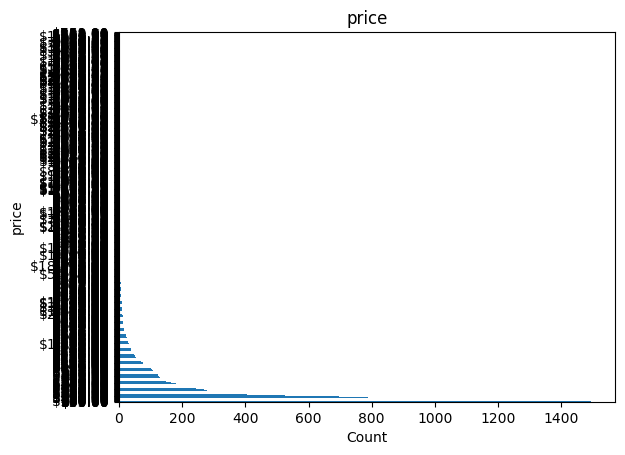

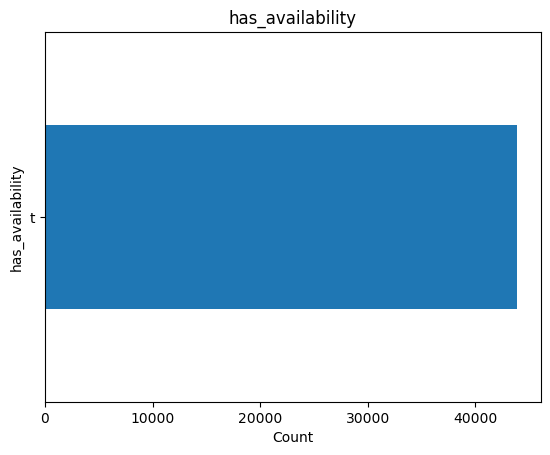

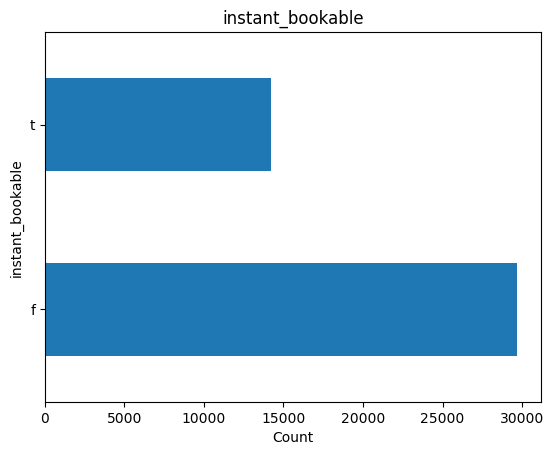

In [28]:
for col in categorical_columns:
    if col not in ['amenities', 'last_review', 'first_review']:
        df[col].value_counts().plot(kind='barh', title=col)
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

In [30]:
# Example of grouped bar plot for two categorical columns
categorical_columns_to_compare = ['column1', 'column2']  # Replace with actual column names

for col in categorical_columns_to_compare:
    if col in df.columns:
        df.groupby(col).size().plot(kind='bar', title=col)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


In [31]:
def string_to_datetime(row, col):
   
    if row[col] is not np.nan:
        return datetime.strptime(row[col], '%Y-%m-%d')
    else:
        return row[col]

In [32]:
df['last_scraped'] = df.apply(string_to_datetime, col = 'last_scraped', axis=1)
df['first_review'] = df.apply(string_to_datetime, col = 'first_review', axis=1)
df['last_review'] = df.apply(string_to_datetime, col = 'last_review', axis=1)

In [33]:
df['days_from_first_review'] = df['last_scraped'] - df['first_review'] 
df['days_from_first_review'] = df['days_from_first_review'].apply(lambda x: x.days)

df['days_from_last_review'] = df['last_scraped'] - df['last_review'] 
df['days_from_last_review'] = df['days_from_last_review'].apply(lambda x: x.days)

In [35]:
cols = ['host_has_profile_pic', 'has_availability']
df.drop(columns=cols, inplace=True)


In [34]:
print('Min days from last review: ',df['days_from_last_review'].min())
print('Max days from last review: ' ,df['days_from_last_review'].max())
print('')
print('Min days from first review: ',df['days_from_first_review'].min())
print('Max days from first review: ' ,df['days_from_first_review'].max())
Convert Dates:
'''
string_to_datetime function changes date strings in colns ('last_scraped', 'first_review', 'last_review') into date.
This helps in making calculations or comparisons with dates easier.
Apply Conversion:
 func is applied to each row in the Frame for the specified columns, converting all date strings to date objects.
Print Date Ranges:

The code then prints the smallest and largest values for columns that show how many days have passed since a review was last made.'''

Min days from last review:  0.0
Max days from last review:  3343.0

Min days from first review:  3.0
Max days from first review:  3901.0


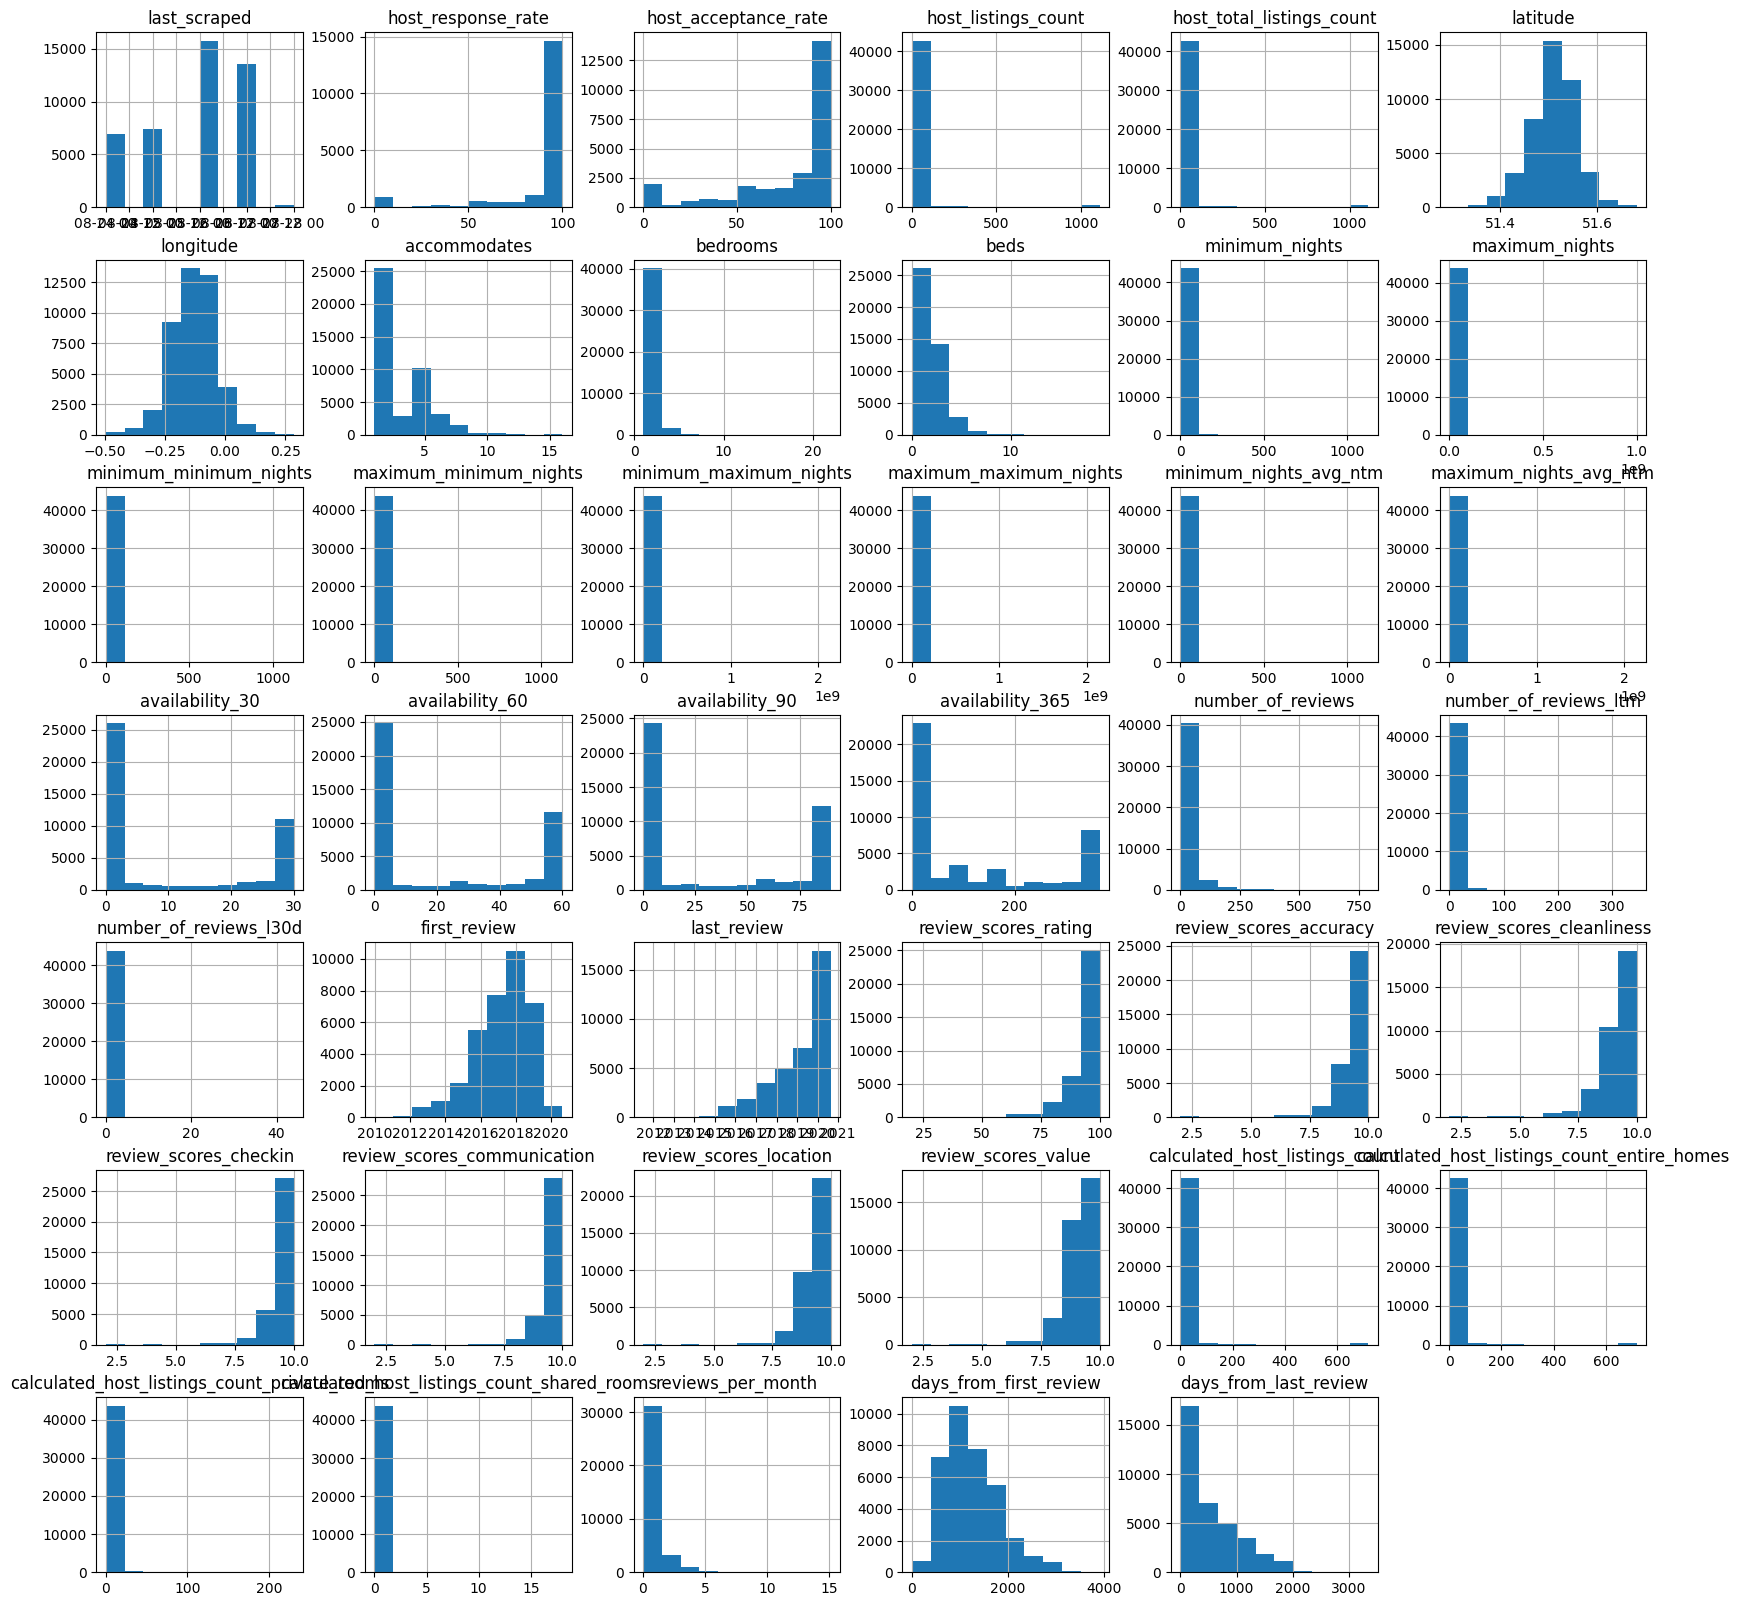

In [37]:
df.hist(figsize=(20,20));

In [41]:
num_cols = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64') ].index.to_list()

In [42]:
corrMatrix = df[num_cols].corr()
corrMatrix['price'].sort_values(ascending=False)

<class 'KeyError'>: 'price'

In [43]:
print(df.columns)


Index(['last_scraped', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listin

In [44]:
print(df['price'].dtype)


object


In [46]:
import seaborn as sn
import json
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

<class 'ModuleNotFoundError'>: No module named 'seaborn'